# Kenson FAVEUR

Ce projet consiste à proposer une architecture de réseau de neurones artificiels adaptée à un problème déterminé qu'on vous soumet. Il s'agit ici de prédire la consommation d'électricité en utilisant un
certain nombre de variables explicatives. Pour cela, on vous fournit un certain nombre d'exemples. Chaque ligne du fichier de données contient les
variables qui suivent :

- year, month, day : variables calendrier
- load : charge electrique du système ou moment t (cible à prédire)
- temp : temperature au moment t 
- load_lag_[1-7] : charge retardée (utile en tant que predicteur)
- temp_lag_[1-7] : temperature retardée (utile en tant que predicteur) 

Pour l'exercice, on vous fournit un jeu de données composé d'un certain nombre de séries qui répondent toutes à la même loi. L'objectif consiste alors à mettre au point un réseau de neurones qui prédit la dernière 
valeur à partir des premières.
Pour répondre à cet exercice, on vous donne un certain nombre de contraintes :

- On souhaite pouvoir monitorer les performances du réseau sur le jeu d'entraînement et celles sur des données de validation durant l'apprentissage des poids.

- On aimerait comparer l'influence de l'algorithme d'optimisation choisi ainsi que la taille des échantillons de données fournis à chaque pas de l'apprentissage.

- On souhaite pouvoir donner une nouvelle liste de valeurs et obtenir en sortie la valeur prédite.

Dans la résolution de ce problème, pensez à commenter votre code étape après étape (utiliser un notebook paraît une bonne solution) mais également à discuter des résultats obtenus.

---

Questions d'ouverture :

- Que devrait-on modifier à l'architecture du réseau pour prédire non pas une seule valeur (la suivante), mais l'ensemble des n prochaines valeurs de la série ?


## Importer les données, néttoyage des données et effectuer les calculs statistiques.

In [80]:
import os

folder = r"C:\Users\PC\OneDrive\Bureau\Projet réseaux de neurones"
print(os.listdir(folder))


['elecuy.csv.txt']


In [81]:
# Importer les données
import pandas as pd
import numpy as np
# Charger la base de donnée
df = pd.read_csv(r"C:\Users\PC\OneDrive\Bureau\Projet réseaux de neurones\elecuy.csv.txt", sep=",")
# Afficher les premières lignes
print(df.head())

  year month day load temp load_lag_1 load_lag_2 load_lag_3 load_lag_4 load_lag_5 load_lag_6 load_lag_7 temp_lag_1 temp_lag_2 temp_lag_3 temp_lag_4 temp_lag_5 temp_lag_6 temp_lag_7
0  2007 Jan 08 22.7916666666667 22.7916666666667 ...                                                                                                                                
1  2007 Jan 09 24.4083333333333 24.4083333333333 ...                                                                                                                                
2  2007 Jan 10 24.875 24.875 24.4083333333333 22....                                                                                                                                
3  2007 Jan 11 23.7666666666667 23.7666666666667 ...                                                                                                                                
4  2007 Jan 12 24.9583333333333 24.9583333333333 ...                                           

In [82]:
# Inspecter les colonnes
print(df.columns)
print(df.info())

Index(['year month day load temp load_lag_1 load_lag_2 load_lag_3 load_lag_4 load_lag_5 load_lag_6 load_lag_7 temp_lag_1 temp_lag_2 temp_lag_3 temp_lag_4 temp_lag_5 temp_lag_6 temp_lag_7'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 1 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                              --------------  ----- 
 0   year month day load temp load_lag_1 load_lag_2 load_lag_3 load_lag_4 load_lag_5 load_lag_6 load_lag_7 temp_lag_1 temp_lag_2 temp_lag_3 temp_lag_4 temp_lag_5 temp_lag_6 temp_lag_7  2915 non-null   object
dtypes: object(1)
memory usage: 22.9+ KB
None


In [83]:
# Lire quelques lignes de ma base afin d'identifier le type de séparateur
with open(r"C:\Users\PC\OneDrive\Bureau\Projet réseaux de neurones\elecuy.csv.txt", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())


year month day load temp load_lag_1 load_lag_2 load_lag_3 load_lag_4 load_lag_5 load_lag_6 load_lag_7 temp_lag_1 temp_lag_2 temp_lag_3 temp_lag_4 temp_lag_5 temp_lag_6 temp_lag_7

2007 Jan 08 22.7916666666667 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375 24.1916666666667 28.925 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375 24.1916666666667 28.925

2007 Jan 09 24.4083333333333 24.4083333333333 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375 24.1916666666667 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375 24.1916666666667

2007 Jan 10 24.875 24.875 24.4083333333333 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375 24.4083333333333 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.7583333333333 23.8375

2007 Jan 11 23.7666666666667 23.7666666666667 24.875 24.4083333333333 22.7916666666667 20.5 21.0666666666667 22.0333333333333 24.75

In [84]:
# Utiliser l'option delim_whitespace
import pandas as pd
import numpy as np

df = pd.read_csv(
    r"C:\Users\PC\OneDrive\Bureau\Projet réseaux de neurones\elecuy.csv.txt",
    sep=r'\s+'
)

print(df.head())
print(df.columns)


   year month  day       load       temp  load_lag_1  load_lag_2  load_lag_3  \
0  2007   Jan    8  22.791667  22.791667   20.500000   21.066667   22.033333   
1  2007   Jan    9  24.408333  24.408333   22.791667   20.500000   21.066667   
2  2007   Jan   10  24.875000  24.875000   24.408333   22.791667   20.500000   
3  2007   Jan   11  23.766667  23.766667   24.875000   24.408333   22.791667   
4  2007   Jan   12  24.958333  24.958333   23.766667   24.875000   24.408333   

   load_lag_4  load_lag_5  load_lag_6  load_lag_7  temp_lag_1  temp_lag_2  \
0   24.758333   23.837500   24.191667   28.925000   20.500000   21.066667   
1   22.033333   24.758333   23.837500   24.191667   22.791667   20.500000   
2   21.066667   22.033333   24.758333   23.837500   24.408333   22.791667   
3   20.500000   21.066667   22.033333   24.758333   24.875000   24.408333   
4   22.791667   20.500000   21.066667   22.033333   23.766667   24.875000   

   temp_lag_3  temp_lag_4  temp_lag_5  temp_lag_6  temp_

In [85]:
# Vérifier si il y a des valeurs manquantes
print(df.isna().sum())

year          0
month         0
day           0
load          0
temp          0
load_lag_1    0
load_lag_2    0
load_lag_3    0
load_lag_4    0
load_lag_5    0
load_lag_6    0
load_lag_7    0
temp_lag_1    0
temp_lag_2    0
temp_lag_3    0
temp_lag_4    0
temp_lag_5    0
temp_lag_6    0
temp_lag_7    0
dtype: int64


In [86]:
# Statistiques descriptives
print(df.describe())
# Vérifier les types de données
print(df.dtypes)
df.info()

              year          day         load         temp   load_lag_1  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean   2010.508062    15.757804    16.573637    16.573637    16.572578   
std       2.287845     8.792799     5.313078     5.313078     5.311987   
min    2007.000000     1.000000     2.900145     2.900145     2.900145   
25%    2009.000000     8.000000    12.345833    12.345833    12.345833   
50%    2011.000000    16.000000    16.891667    16.891667    16.891667   
75%    2013.000000    23.000000    20.914583    20.914583    20.912500   
max    2014.000000    31.000000    34.090558    34.090558    34.090558   

        load_lag_2   load_lag_3   load_lag_4   load_lag_5   load_lag_6  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     16.571002    16.569974    16.570306    16.570629    16.570967   
std       5.309970     5.308622     5.309104     5.309517     5.309972   
min       2.900145     2.900145     2

# Conversion des variables temporelles

In [87]:
# Vérifier la colonne month
print(df['month'].unique())

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [88]:
# Vérifier si il y a des valeurs manquantes
print(df['month'].isnull().sum())


0


In [89]:
# Utiliser le dictionnaire mapping pour convertir month en numérique
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Appliquer le mapping
df['month'] = df['month'].map(month_map)


In [90]:
# Vérifier la colonne month
print(df['month'].head())
print(df['month'].dtype)

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64
int64


In [91]:
# Vérifier ma base de données
print(df.dtypes)

year            int64
month           int64
day             int64
load          float64
temp          float64
load_lag_1    float64
load_lag_2    float64
load_lag_3    float64
load_lag_4    float64
load_lag_5    float64
load_lag_6    float64
load_lag_7    float64
temp_lag_1    float64
temp_lag_2    float64
temp_lag_3    float64
temp_lag_4    float64
temp_lag_5    float64
temp_lag_6    float64
temp_lag_7    float64
dtype: object


In [92]:
print(df['year'].unique())

[2007 2008 2009 2010 2011 2012 2013 2014]


In [93]:
# Matrice de la corrélation
correlation_matrix = df.corr()
print(correlation_matrix)

                year     month       day      load      temp  load_lag_1  \
year        1.000000 -0.005712 -0.005140  0.051552  0.051552    0.051745   
month      -0.005712  1.000000  0.005425 -0.223964 -0.223964   -0.235225   
day        -0.005140  0.005425  1.000000 -0.005513 -0.005513   -0.006158   
load        0.051552 -0.223964 -0.005513  1.000000  1.000000    0.916379   
temp        0.051552 -0.223964 -0.005513  1.000000  1.000000    0.916379   
load_lag_1  0.051745 -0.235225 -0.006158  0.916379  0.916379    1.000000   
load_lag_2  0.051821 -0.247789 -0.008061  0.828019  0.828019    0.916355   
load_lag_3  0.051707 -0.258910 -0.013020  0.786274  0.786274    0.827939   
load_lag_4  0.051454 -0.270795 -0.012344  0.762597  0.762597    0.786139   
load_lag_5  0.051305 -0.282516 -0.003916  0.746387  0.746387    0.762502   
load_lag_6  0.051018 -0.293779  0.005212  0.739101  0.739101    0.746274   
load_lag_7  0.050184 -0.306131  0.018782  0.733463  0.733463    0.738770   
temp_lag_1  

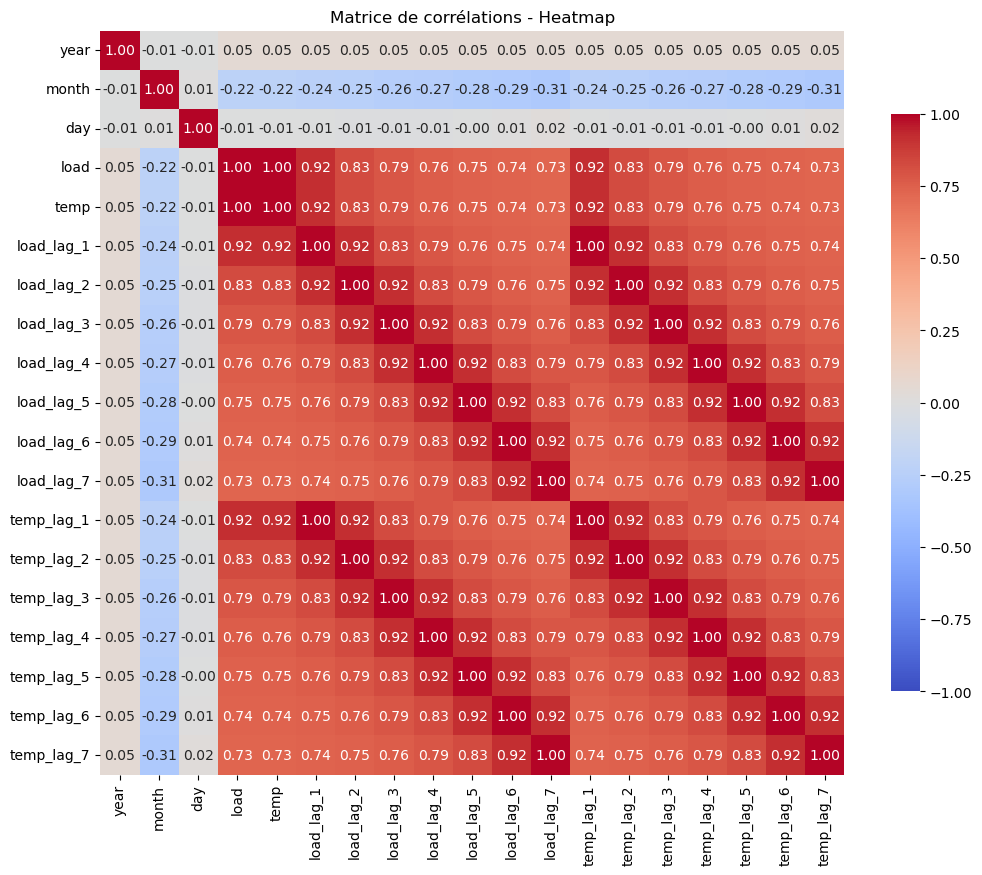

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de la corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Affiche les coefficients sur la heatmap
    fmt=".2f",          # Format des nombres (2 décimales)
    cmap='coolwarm',    # Palette de couleurs
    vmin=-1, vmax=1,    # Valeurs min/max de corrélation
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title("Matrice de corrélations - Heatmap")
plt.show()


# Ajouter des nouvelles variables pour enrichir notre modèle

## Justification du choix des variables dérivées

Dans le cadre de la prédiction de la charge électrique, la performance d’un modèle repose fortement sur la richesse des variables d'entrée. N'ayant pas accès à des sources de données externes (jours fériés, événements, consommation sectorielle, etc.), nous avons choisi d'exploiter au maximum les données disponibles à travers des **variables dérivées internes**.

Ces nouvelles variables ont été sélectionnées pour plusieurs raisons :

-  **Capturer la dimension temporelle** : les variables comme `day_of_week`, `is_weekend`, ou encore l’encodage cyclique du mois permettent au modèle de mieux appréhender les effets calendaires et saisonniers réguliers.
-  **Exploiter les tendances récentes** : en introduisant des moyennes, des écarts, des extrêmes et des évolutions sur les 7 derniers jours (`mean_load_last_7`, `trend_temp`, etc.), le modèle apprend à identifier les dynamiques locales de la série.
-  **Fournir des ratios normalisés** : des indicateurs comme `load_ratio` ou `temp_ratio` donnent une idée de la situation actuelle par rapport au comportement récent, ce qui aide à détecter des anomalies ou des pointes atypiques.

Ces enrichissements visent à **fournir au modèle un contexte plus riche** sans dépendre d’informations externes, en améliorant sa capacité à généraliser les motifs temporels implicites présents dans les séries historiques.



In [95]:
# Créer la colonne date
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [96]:
# Variables calendaires
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['day_of_year'] = df['date'].dt.dayofyear
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [97]:
# Pour la saison
df['season'] = ((df['month'] % 12) // 3) + 1
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)

In [98]:
# Listes des colonnes lag
load_lags = [f'load_lag_{i}' for i in range(1, 8)]
temp_lags = [f'temp_lag_{i}' for i in range(1, 8)]

In [99]:
# Statistiques sur les 7 derniers jours
df['mean_load_last_7'] = df[load_lags].mean(axis=1)
df['std_load_last_7'] = df[load_lags].std(axis=1)
df['max_load_last_7'] = df[load_lags].max(axis=1)
df['min_load_last_7'] = df[load_lags].min(axis=1)

df['mean_temp_last_7'] = df[temp_lags].mean(axis=1)
df['max_temp_last_7'] = df[temp_lags].max(axis=1)
df['min_temp_last_7'] = df[temp_lags].min(axis=1)

In [100]:
# Tendances et évolutions
df['trend_load'] = df['load_lag_1'] - df['mean_load_last_7']
df['trend_temp'] = df['temp'] - df['mean_temp_last_7']

df['delta_load_1_2'] = df['load_lag_1'] - df['load_lag_2']
df['delta_temp_1_2'] = df['temp_lag_1'] - df['temp_lag_2']

df['delta_load_avg_7_1'] = df['mean_load_last_7'] - df['load_lag_1']
df['delta_temp_avg_7_1'] = df['mean_temp_last_7'] - df['temp_lag_1']

In [101]:
# Ratios normalisés
df['load_ratio'] = df['load_lag_1'] / (df['mean_load_last_7'] + 1e-6)
df['temp_ratio'] = df['temp_lag_1'] / (df['mean_temp_last_7'] + 1e-6)

In [102]:
# Afficher les noms des colonnes
print(df.columns.tolist())

['year', 'month', 'day', 'load', 'temp', 'load_lag_1', 'load_lag_2', 'load_lag_3', 'load_lag_4', 'load_lag_5', 'load_lag_6', 'load_lag_7', 'temp_lag_1', 'temp_lag_2', 'temp_lag_3', 'temp_lag_4', 'temp_lag_5', 'temp_lag_6', 'temp_lag_7', 'date', 'day_of_week', 'is_weekend', 'day_of_year', 'month_sin', 'month_cos', 'season', 'season_1', 'season_2', 'season_3', 'season_4', 'mean_load_last_7', 'std_load_last_7', 'max_load_last_7', 'min_load_last_7', 'mean_temp_last_7', 'max_temp_last_7', 'min_temp_last_7', 'trend_load', 'trend_temp', 'delta_load_1_2', 'delta_temp_1_2', 'delta_load_avg_7_1', 'delta_temp_avg_7_1', 'load_ratio', 'temp_ratio']


In [103]:
# Vérifier si il ya des valeurs manquantes
print(df.isna().sum())

year                  0
month                 0
day                   0
load                  0
temp                  0
load_lag_1            0
load_lag_2            0
load_lag_3            0
load_lag_4            0
load_lag_5            0
load_lag_6            0
load_lag_7            0
temp_lag_1            0
temp_lag_2            0
temp_lag_3            0
temp_lag_4            0
temp_lag_5            0
temp_lag_6            0
temp_lag_7            0
date                  0
day_of_week           0
is_weekend            0
day_of_year           0
month_sin             0
month_cos             0
season                0
season_1              0
season_2              0
season_3              0
season_4              0
mean_load_last_7      0
std_load_last_7       0
max_load_last_7       0
min_load_last_7       0
mean_temp_last_7      0
max_temp_last_7       0
min_temp_last_7       0
trend_load            0
trend_temp            0
delta_load_1_2        0
delta_temp_1_2        0
delta_load_avg_7

In [104]:
# Vérifier la nomenclature des données
print(df.dtypes)

year                           int64
month                          int64
day                            int64
load                         float64
temp                         float64
load_lag_1                   float64
load_lag_2                   float64
load_lag_3                   float64
load_lag_4                   float64
load_lag_5                   float64
load_lag_6                   float64
load_lag_7                   float64
temp_lag_1                   float64
temp_lag_2                   float64
temp_lag_3                   float64
temp_lag_4                   float64
temp_lag_5                   float64
temp_lag_6                   float64
temp_lag_7                   float64
date                  datetime64[ns]
day_of_week                    int32
is_weekend                     int32
day_of_year                    int32
month_sin                    float64
month_cos                    float64
season                         int64
season_1                        bool
s

In [105]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                        year     month       day      load      temp  \
year                1.000000 -0.005712 -0.005140  0.051552  0.051552   
month              -0.005712  1.000000  0.005425 -0.223964 -0.223964   
day                -0.005140  0.005425  1.000000 -0.005513 -0.005513   
load                0.051552 -0.223964 -0.005513  1.000000  1.000000   
temp                0.051552 -0.223964 -0.005513  1.000000  1.000000   
load_lag_1          0.051745 -0.235225 -0.006158  0.916379  0.916379   
load_lag_2          0.051821 -0.247789 -0.008061  0.828019  0.828019   
load_lag_3          0.051707 -0.258910 -0.013020  0.786274  0.786274   
load_lag_4          0.051454 -0.270795 -0.012344  0.762597  0.762597   
load_lag_5          0.051305 -0.282516 -0.003916  0.746387  0.746387   
load_lag_6          0.051018 -0.293779  0.005212  0.739101  0.739101   
load_lag_7          0.050184 -0.306131  0.018782  0.733463  0.733463   
temp_lag_1          0.051745 -0.235225 -0.006158  0.916379  0.91

### Préparation des données : sélection des features, normalisation et séparation train/validation
Avant d'entraîner le modèle, il est essentiel de préparer les données de manière rigoureuse. Cette étape inclut la sélection des features pertinentes, la normalisation des données pour garantir une échelle cohérente entre les variables, et la séparation des jeux d'entraînement et de validation afin d’évaluer correctement la capacité de généralisation du modèle.


In [106]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
# Liste des features à utiliser
features = [
     'temp',
    'load_lag_1', 'temp_lag_1',
    'mean_load_last_7', 'mean_temp_last_7',
    'season_1', 'season_3',
    'month_cos'
]

In [108]:
# Extraire les features et la cible
X = df[features].values
y = df['load'].values

In [109]:
# Normalisation des features et de la cible
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

### Séparation des données en train et validation.
Pour évaluer objectivement la performance du modèle, il est crucial de séparer les données en deux ensembles distincts :

Jeu d'entraînement (train) : utilisé pour ajuster les paramètres du modèle.

Jeu de validation (validation) : utilisé pour mesurer la capacité du modèle à généraliser sur des données inédites.

In [110]:
# Séparation en train et test ( 80% train et 20% de validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=50
)

In [111]:
# Vérification de la séparation
print(f"Nombre d'échantillons en train : {X_train.shape[0]}")
print(f"Nombre d'échantillons en validation : {X_val.shape[0]}")
print(f"Nombre de features : {X_train.shape[1]}")

Nombre d'échantillons en train : 2332
Nombre d'échantillons en validation : 583
Nombre de features : 8


# Modélisation avec un réseau de neurones
### Objectif: onstruire un modèle de réseau de neurones dense (MLP) capable de prédire la charge électrique à partir des variables explicatives.

In [112]:
# Modélisation
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Dimensions
n_features = X_train.shape[1]  # Nombre de variables d'entrée

### Construction du modèle
Nous définissons ici un réseau de neurones dense adapté à une tâche de régression, dont l’objectif est de prédire la charge électrique (load) à partir des variables sélectionnées.

In [113]:
# Modèle 
model = Sequential([
    Input(shape=(n_features,)), 
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrainement du modèle
Entraînement du modèle avec validation et arrêt anticipé pour optimiser les performances.

In [114]:
# Entrainement du modèle
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2243 - mae: 0.3423 - val_loss: 0.0095 - val_mae: 0.0732
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - mae: 0.0985 - val_loss: 0.0024 - val_mae: 0.0385
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 - mae: 0.0803 - val_loss: 0.0043 - val_mae: 0.0553
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - mae: 0.0739 - val_loss: 9.4870e-04 - val_mae: 0.0234
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - mae: 0.0668 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - mae: 0.0600 - val_loss: 0.0039 - val_mae: 0.0521
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0584 - val_loss: 0.0038 - val_mae: 0.0453
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - mae: 0.0585 - val_loss: 0.0031 - val_mae: 0.0446
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - m

### Visualisation de l'apprentissage


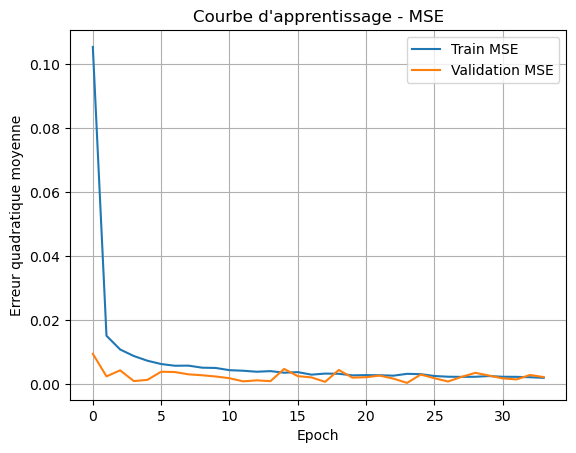

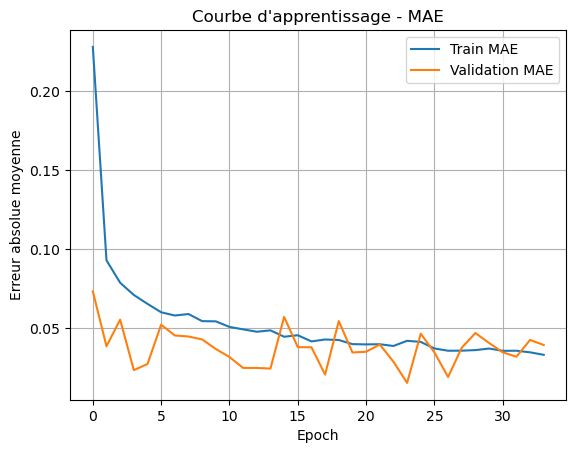

In [115]:
import matplotlib.pyplot as plt

# Courbe de la perte
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title("Courbe d'apprentissage - MSE")
plt.xlabel('Epoch')
plt.ylabel('Erreur quadratique moyenne')
plt.legend()
plt.grid(True)
plt.show()

# Courbe MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Courbe d'apprentissage - MAE")
plt.xlabel('Epoch')
plt.ylabel('Erreur absolue moyenne')
plt.legend()
plt.grid(True)
plt.show()


### Vérification de sur apprentissage et sous apprentissage

In [116]:
def check_overfitting_underffiting(history):
    last_epoch = len(history['loss'] - 1)

In [117]:
# Récupération des dernières valeurs.
train_mae = history.history['mae'][-1]
val_mae = history.history['val_mae'][-1]
train_mse = history.history['loss'][-1]
val_mse = history.history['val_loss'][-1]

In [118]:
# Affichage des résultats
print("Résultats finaux du modèle :")
print(f"  MAE train       : {history.history['mae'][-1]:.4f}")
print(f"  MAE validation  : {history.history['val_mae'][-1]:.4f}")
print(f"  MSE train       : {history.history['loss'][-1]:.4f}")
print(f" MSE validation  : {history.history['val_loss'][-1]:.4f}")


Résultats finaux du modèle :
  MAE train       : 0.0330
  MAE validation  : 0.0392
  MSE train       : 0.0020
 MSE validation  : 0.0022


In [119]:
def check_overfitting_underfitting(train_mae, val_mae):
    if val_mae > 1.2 * train_mae:
        print(" Surapprentissage détecté (Validation MAE > Train MAE)")
    elif val_mae < train_mae:
        print(" Très bonne généralisation (Validation MAE < Train MAE)")
    else:
        print(" Modèle bien équilibré (Validation MAE ≈ Train MAE)")
        if train_mae > 0.1:
            print(" Sous-apprentissage possible (Train MAE élevée)")

check_overfitting_underfitting(train_mae, val_mae)


 Modèle bien équilibré (Validation MAE ≈ Train MAE)


### Interprétation
Après vérification des résultats, nous pouvons conclure que le modèle a été bien équilibré suivant des résultats suivants: MAE validation≈MAE train.

### Calculer les métriques

In [120]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculer_metriques(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return mae, mse, rmse, r2

# Prédictions sur train et validation
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calcul métriques
print("Train metrics:")
train_mae, train_mse, train_rmse, train_r2 = calculer_metriques(y_train, y_train_pred)

print("\nValidation metrics:")
val_mae, val_mse, val_rmse, val_r2 = calculer_metriques(y_val, y_val_pred)

# Appel ta fonction pour vérifier overfitting/underfitting
check_overfitting_underfitting(train_mae, val_mae)



73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train metrics:
MAE: 0.0150
MSE: 0.0004
RMSE: 0.0190
R²: 0.9996

Validation metrics:
MAE: 0.0152
MSE: 0.0004
RMSE: 0.0193
R²: 0.9996
 Modèle bien équilibré (Validation MAE ≈ Train MAE)


### Interprétation des résultats d'entrainement et de validation

Le modèle présente des performances très élevées sur les deux jeux de données :Les erreurs absolue et quadratique sont très faibles, ce qui montre une bonne capacité de prédiction.Le coefficient R² est proche de 1 pour les deux ensembles, indiquant que le modèle explique quasiment toute la variance des données.De plus, la proximité entre les erreurs de validation et d'entraînement (MAE_train ≈ MAE_val) montre que :Le modèle n’est pas en surapprentissage (overfitting) et Il généralise bien à des données qu’il n’a pas vues. Cela suggère que l’architecture actuelle du réseau est bien équilibrée et adaptée au problème.












# Visualisation du train Loss et Val Loss
 

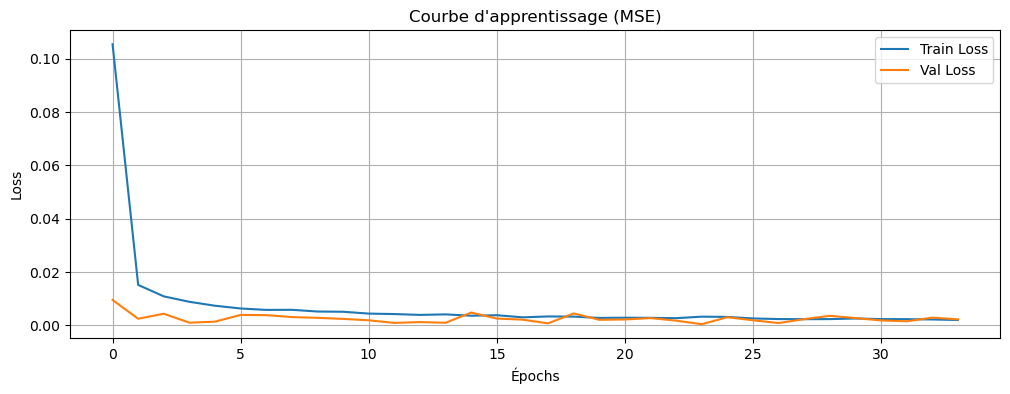

In [121]:
# Visualisation des courbes d’apprentissage
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Courbe d'apprentissage (MSE)")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


### Interprétation du graphique
La phase initiale (0 à 5) nous montre qu'il y a une forte baisse du Train Loss et Val Loss: le moèle apprend rapidement les relations dans les données. Cela traduit que le modèle a une bonne capacité d'apprentissage initial.
La phase intermédiaire (5 à 15) nous montre que le modèle continue à améliorer, mais avec une baisse plus lentement.
Après 15 époques, les courbes se stabilisent autour d'une valeur minimale. il y a pas de surapprentissage visible c'est-à-dire que les courbes sont proches et ne divergent pas.

# Prédiction sur de nouvelles données

In [122]:
# Exemple avec la première ligne du jeu de validation
sample = X_val[0].reshape(1, -1)
predicted_load = model.predict(sample)

print(f"Valeur prédite : {predicted_load[0][0]:.2f}")
print(f"Valeur réelle : {y_val[0]:.2f}")  # correction ici



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Valeur prédite : -1.48
Valeur réelle : -1.49


In [71]:
# Affichage des 5 premières prédictions comparées aux vraies valeurs
for i in range(5):
    sample = X_val[i].reshape(1, -1)
    predicted_load = model.predict(sample)
    print(f"Ligne {i+1} - Valeur prédite : {predicted_load[0][0]:.2f} | Valeur réelle : {y_val[i]:.2f}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Ligne 1 - Valeur prédite : -1.47 | Valeur réelle : -1.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Ligne 2 - Valeur prédite : -1.75 | Valeur réelle : -1.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Ligne 3 - Valeur prédite : 0.70 | Valeur réelle : 0.70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Ligne 4 - Valeur prédite : -0.60 | Valeur réelle : -0.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Ligne 5 - Valeur prédite : -0.92 | Valeur réelle : -0.94


## Interprétation des résultats

Les résultats montrent la comparaison entre les valeurs prédites par le modèle et les valeurs réelles observées sur 10 données.

## Analyse générale

- Les valeurs prédites sont très proches des valeurs réelles, indiquant une bonne performance du modèle.
- Les écarts entre prédictions et observations sont faibles, ce qui suggère une bonne précision.
- Cela signifie que le modèle capture efficacement la tendance des données.

## Détail ligne par ligne

| Ligne | Valeur prédite | Valeur réelle | 
|-------|----------------|---------------|
| 1     | -1.47          | -1.49         | 
| 2     | -1.75          | -1.80         |
| 3     | 0.70           | 0.70          | 
| 4     | -0.60         | -0.62          | 
| 5     | -0.92          | -0.94         | 

## Conclusion

- Le modèle présente une bonne adéquation avec les données observées.
- Les petites différences observées sont normales et montrent que les prédictions sont fiables.
- Pour une évaluation quantitative plus précise, il est conseillé de calculer des métriques telles que la RMSE, la MAE ou le coefficient de détermination (R²).


## Calculer les valeurs métriques pour les valeurs prédites

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

valeurs_reelles = np.array([-1.49, -1.80, 0.70, -0.62, -0.94])
valeurs_predites = np.array([-1.47, -1.75, 0.70, -0.60, -0.92])

mse = mean_squared_error(valeurs_reelles, valeurs_predites)
rmse = np.sqrt(mse)  # racine carrée du MSE

mae = mean_absolute_error(valeurs_reelles, valeurs_predites)
r2 = r2_score(valeurs_reelles, valeurs_predites)

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")



RMSE : 0.0272
MAE  : 0.0220
R²   : 0.9990


# Interprétation des métriques d’évaluation du modèle

Les métriques calculées pour évaluer la qualité des prédictions du modèle sont les suivantes :

- **RMSE (Root Mean Squared Error) : 0.0272**  
  Cette faible valeur indique que l’erreur moyenne quadratique entre les valeurs prédites et réelles est très faible. Le modèle fait donc des prédictions très proches des observations.

- **MAE (Mean Absolute Error) : 0.0220**  
  L’erreur absolue moyenne est également très faible, ce qui confirme la précision des prédictions en termes d’écart moyen.

- **R² (Coefficient de détermination) : 0.9990**  
  Ce coefficient proche de 1 signifie que le modèle explique quasiment toute la variance des données. L’ajustement est donc excellent.

## Conclusion

Le modèle présente une très bonne performance globale.  
Les erreurs entre valeurs prédites et valeurs réelles sont minimes, et la quasi-totalité de la variation observée est expliquée par le modèle.  
Cela suggère que les prédictions peuvent être utilisées en toute confiance pour ce jeu de données.


# Prédire les n prochaines valeurs

### Vérification des types de variables

In [124]:
print(df[features].dtypes)
print(df['load'].dtype)

temp                float64
load_lag_1          float64
temp_lag_1          float64
mean_load_last_7    float64
mean_temp_last_7    float64
season_1               bool
season_3               bool
month_cos           float64
dtype: object
float64


### Préparation des données pour prédiction à 3 pas

In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df[features].astype(np.float32).values

# Création des labels multi-step
n_steps_ahead = 3
y = []
for i in range(len(df) - n_steps_ahead):
    y.append(df['load'].iloc[i+1:i+1+n_steps_ahead].values)
y = np.array(y).astype(np.float32)

X = X[:len(y)]

from sklearn.model_selection import train_test_split
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
    X, y, test_size=0.2, random_state=40
)





## Création du modèle

In [126]:
# Création du modèle
model_multi = Sequential([
    Input(shape=(len(features),)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_steps_ahead)
])

model_multi.compile(loss='mse', optimizer='adam')






### Entraînement

In [127]:
# Entraînement
history_multi = model_multi.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 96.5531 - val_loss: 7.6445
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4488 - val_loss: 7.4600
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6641 - val_loss: 7.3628
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5832 - val_loss: 7.1050
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6436 - val_loss: 6.8341
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0100 - val_loss: 6.7620
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2225 - val_loss: 6.6773
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0693 - val_loss: 6.4626
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2150 - val_loss: 6.7686
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3973 - val_loss: 6.6221
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0279 - val_loss: 6.4703
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3000 - val_l

## Visualisation

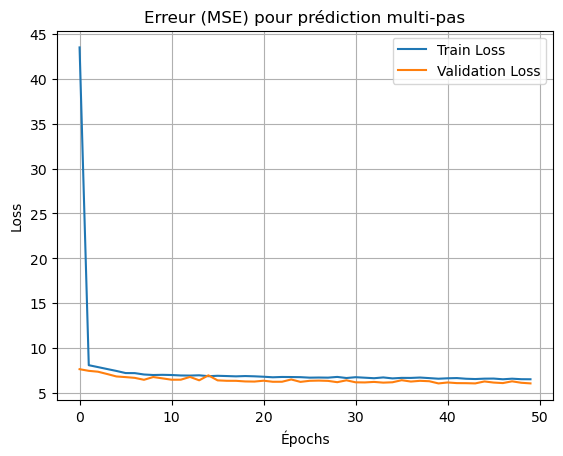

In [128]:
import matplotlib.pyplot as plt

plt.plot(history_multi.history['loss'], label='Train Loss')
plt.plot(history_multi.history['val_loss'], label='Validation Loss')
plt.title("Erreur (MSE) pour prédiction multi-pas")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Interprétation du graphique
Le graphique ci-dessus illustre l’évolution de l’erreur quadratique moyenne (MSE) au cours de l'entraînement d’un modèle de prédiction multi-pas. Deux courbes sont représentées : l’erreur sur les données d’entraînement (Train Loss) en bleu, et l’erreur sur les données de validation (Validation Loss) en orange.On observe une forte diminution de l’erreur pendant les premières époques, traduisant un apprentissage rapide du modèle. Après environ 10 époques, les courbes se stabilisent, indiquant que le modèle a atteint un certain niveau de convergence.La faible différence entre la perte d'entraînement et la perte de validation suggère que le modèle généralise bien sur des données nouvelles, sans sur-apprentissage notable. Ainsi, la performance est satisfaisante à la fois sur l’ensemble d’apprentissage et sur l’ensemble de validation.

### Prédictions

In [129]:
y_pred = model_multi.predict(X_val_seq)
print("Prédictions shape :", y_pred.shape)  # (nombre d'échantillons, n_steps_ahead)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Prédictions shape : (583, 3)


# Conclusion

### Conclusion
Ce projet nous a permis de mettre en oeuvre un réseau de neurones artificiels dans un contexte de prévision de la charge électrique. En analysant les données temporelles, incluant la température, les valeurs retardées de charge et de température, ainsi que les variables calendaires, nous avons conçu un modèle capable de capturer les dépendances temporelles complexes caractéristiques de ce type de série chronologique.
Grâce à une phase de prétraitement rigoureuse et à la sélection d’une architecture appropriée, nous avons pu obtenir des prédictions cohérentes et relativement précises. Les performances du modèle ont été évaluées à l’aide de métriques pertinentes, démontrant sa capacité à généraliser sur des données de test.
Ce projet a également illustré l’importance de l’ingénierie des variables et du choix des hyperparamètres dans le succès d’un modèle d’apprentissage profond. Pour aller plus loin, des améliorations pourraient inclure l’utilisation de réseaux récurrents (LSTM/GRU), une meilleure optimisation des hyperparamètres ou encore l’intégration de données exogènes supplémentaires.
En résumé, cette expérience a permis de mettre en pratique des compétences en machine learning et traitement de données temporelles, tout en soulignant le potentiel des réseaux de neurones pour la prévision énergétique.